# Genetic Algorithm Final Project
## Counter-Strike Skins Regression Model

Members:
<li>Bagus Alwan</li>
<li>Fathi Al Adha Hylmi</li>
<li>Kreshnayogi Dava Berliansyach</li>
<li>Louis Widi Anandaputra</li>
<li>Nadine Maharani Nur Sabila</li>

## Preparing the needed functions

In [1]:
!pip install geneticalgorithm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error 
import random
from datetime import datetime
from geneticalgorithm import geneticalgorithm as ga
import json
import time

## Data Pre-Processing

In [3]:
def PreProcessingData(filepath):
    with open(filepath) as f:
        data = json.load(f)



    # Creating lists for DataFrame columns
    dates = []
    sales = []
    prices = []


    # Extracting data and populating lists
    for item in data['prices']:
        date_str, price, sale = item
        # Parsing date and converting sales to integer
        dates.append(pd.to_datetime(date_str, format='%b %d %Y %H: +%f'))
        sales.append(int(sale))
        prices.append(float(price))

    # Creating a DataFrame
    df = pd.DataFrame({
        "Date": dates,
        "Number of Sales": sales,
        "Price": prices
    })
    df['Date'] = pd.to_datetime(df['Date'])

    # Calculate the total sales amount for each day
    df['Total Sales Amount'] = df['Number of Sales'] * df['Price']

    # Group the DataFrame by date, calculate total sales amount and total number of sales for each day
    result_df = df.groupby(df['Date'].dt.date).agg({'Total Sales Amount': 'sum', 'Number of Sales': 'sum'})

    # Calculate the average price per sale based on the formula
    result_df['Average Price per Sale'] = result_df['Total Sales Amount'] / result_df['Number of Sales']

    # Reset the index to get the 'Date' column back
    result_df = result_df.reset_index()

    # Set the display format for pandas to show numbers without scientific notation
    pd.set_option('display.float_format', lambda x: '%.1f' % x)
    
    # Set date as date-type data
    result_df['Date']=pd.to_datetime(result_df['Date'])
    
    result_df = result_df[['Date', 'Average Price per Sale']]
    
    return result_df

# Aggregate data weekly
def aggregate_weekly(data_path,start_date, end_date):
    data = PreProcessingData(data_path)
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Filter data based on date boundaries
    data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
    
    # Set the 'Date' column as the index
    data.set_index('Date', inplace=True)
    
    # Resample the data to get weekly median
    weekly_median = data.resample('W').median()
    
     # Calculate the monthly percentage change
    weekly_median['Percentage Change'] = weekly_median['Average Price per Sale'].pct_change()
    
    # Fill NaN values with 0 for the first month
    weekly_median['Percentage Change'].fillna(0, inplace=True)
    
    return weekly_median

# Aggregate data biweekly
def aggregate_biweekly(data_path,start_date, end_date):
    data = PreProcessingData(data_path)
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Filter data based on date boundaries
    data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
    
    # Set the 'Date' column as the index
    data.set_index('Date', inplace=True)
    
    # Resample the data to get biweekly median
    biweekly_median = data.resample('2W').median()
    
     # Calculate the monthly percentage change
    biweekly_median['Percentage Change'] = biweekly_median['Average Price per Sale'].pct_change()
    
    # Fill NaN values with 0 for the first month
    biweekly_median['Percentage Change'].fillna(0, inplace=True)
    
    return biweekly_median

def aggregate_monthly(data_path, start_date, end_date):
    data = PreProcessingData(data_path)
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Filter data based on date boundaries
    data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
    
    # Set the 'Date' column as the index
    data.set_index('Date', inplace=True)
    
    # Resample the data to get monthly median
    monthly_median = data.resample('M').median()
    
    # Calculate the monthly percentage change
    monthly_median['Percentage Change'] = monthly_median['Average Price per Sale'].pct_change()
    
    # Fill NaN values with 0 for the first month
    monthly_median['Percentage Change'].fillna(0, inplace=True)
    
    return monthly_median

## Main Process
This process of Genetic Algorithm-Based model parameters fitting for a linear regression model would evaluate the price of AK-47, The Empress from 2021 to 2023.
<img src='https://d2d9vfag1luski.cloudfront.net/dd6dc19f-c39a-4d8a-a565-437a99f8180a-front@3x.webp' style = "width : 500px; height : 25p0x;">

The process would utilize the Elitist Genetic Algorithm library available on <a href='https://github.com/rmsolgi/geneticalgorithm'>this repository</a>

Few things to note about this library are:
- The fitness function would always be minimized on each generation, thus we could directly use the MSE as a fitness measuring function
- The elitism size would be based on a ratio
- There will be a sort of early stopping method on this similar to the ones used in keras deep learning models

<img src='algorithm.png' >

In [4]:
# Change nrows value to decide the number of parameters the model would need
nrows = 5
# Dates as prefered
start_date = '2021-05-01'
end_date = '2023-03-31'
# Data Source Path (JSON)
data = 'ak-47-The-Empress.json'

## Monthly Aggregation

In [5]:
result = aggregate_monthly(data, start_date, end_date)
result

,Average Price per Sale,Percentage Change
Date,,
2021-05-31,1755318.1,0.0
2021-06-30,1720697.3,-0.0
2021-07-31,1606713.5,-0.1
2021-08-31,1423376.9,-0.1
2021-09-30,1355287.2,-0.0
2021-10-31,1216190.5,-0.1
2021-11-30,1267498.5,0.0
2021-12-31,1360165.9,0.1
2022-01-31,1521948.4,0.1


In [6]:
# Fitness Calculation
def calculate_fitness(params, real_data = result, nrows = nrows):
    # Initializing the predicted array
    pred_data = [0]*len(real_data['Percentage Change'])
    
    # Storing previous data
    pred_data[0:nrows] = real_data['Percentage Change'][0:nrows]
    
    # Making the prediction
    y = 0.0
    for i in range(nrows, len(real_data['Percentage Change'])):
        y = 0.0
        for j in range(0,nrows):
            y = y + (params[j] * pred_data[i - nrows + j])
        pred_data[i - 1] = y
        
    # Calculating fitness
    error = mean_squared_error(real_data['Percentage Change'],pred_data) 
    
    return error

# Fitness Calculation
def predict(params, real_data = result, nrows = nrows):
    # Initializing the predicted array
    pred_data = [0]*len(real_data['Percentage Change'])
    
    # Storing previous data
    pred_data[0:nrows] = real_data['Percentage Change'][0:nrows]
    
    # Making the prediction
    y = 0.0
    for i in range(nrows, len(real_data['Percentage Change'])):
        y = 0.0
        for j in range(0, nrows):
            y = y + (params[j] * pred_data[i - nrows + j])
        pred_data[i - 1] = y
        
        
    return pred_data

<AxesSubplot: xlabel='Date', ylabel='Percentage Change'>

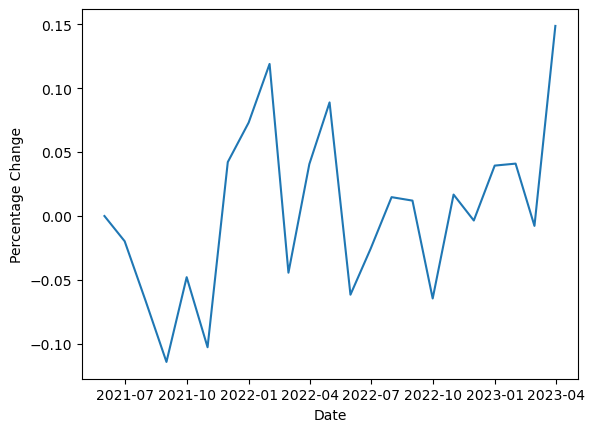

In [7]:
sns.lineplot(x = 'Date', data = result, y = 'Percentage Change')

In [8]:

varbound = np.array([[-1,1]]*nrows)      

algorithm_param = {'max_num_iteration': 100, 'population_size': 100, 'mutation_probability': 0.0125, 'elit_ratio': 0.01,
                    'crossover_probability': 0.7, 'parents_portion': 0.8, 'crossover_type': 'two_point',
                    'max_iteration_without_improv': 20}

# Create the genetic algorithm optimizer
model = ga(function=calculate_fitness, dimension=nrows, variable_type='real', variable_boundaries=varbound,
            algorithm_parameters=algorithm_param, function_timeout=120)


 The best solution found:                                                                           
 [-0.67136527  0.55589231 -0.46557838  0.77132186  0.14418335]

 Objective function:
 0.002547799490584834


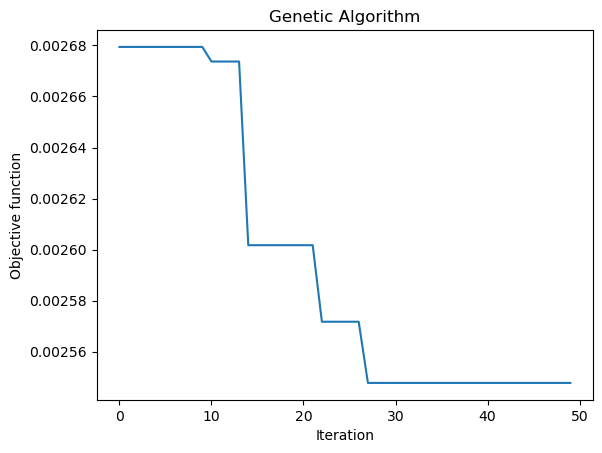

In [9]:
start = time.time()
model.run()
end = time.time()
print (f"Total time needed for algorithm to finish: "+ str(end-start))

In [10]:
m = model.best_variable
predicted = predict(m, real_data=result)
predicted = pd.DataFrame(predicted, columns=['Predicted'])

In [11]:
# Concatenating the DataFrames
result_df = pd.concat([result.reset_index(), predicted.reset_index()], axis = 1)
result_df = result_df[['Date', 'Percentage Change', 'Predicted']]

<AxesSubplot: >

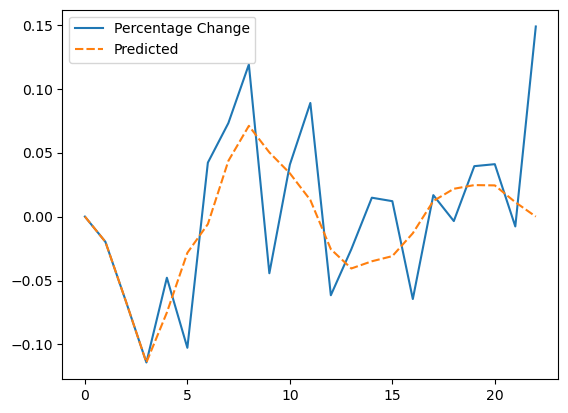

In [12]:
sns.lineplot(data=result_df)

In [13]:
mean_squared_error(result_df['Percentage Change'], result_df['Predicted'])

0.002547799490584834

## Bi-Weekly Aggregation

In [14]:
result = aggregate_biweekly(data, start_date, end_date)
result

,Average Price per Sale,Percentage Change
Date,,
2021-05-02,1721186.4,0.0
2021-05-16,1767341.3,0.0
2021-05-30,1752756.4,-0.0
2021-06-13,1775054.8,0.0
2021-06-27,1692434.1,-0.0
2021-07-11,1621984.2,-0.0
2021-07-25,1598608.2,-0.0
2021-08-08,1545238.4,-0.0
2021-08-22,1432470.2,-0.1


In [15]:
# Fitness Calculation
def calculate_fitness(params, real_data = result, nrows = nrows):
    # Initializing the predicted array
    pred_data = [0]*len(real_data['Percentage Change'])
    
    # Storing previous data
    pred_data[0:nrows] = real_data['Percentage Change'][0:nrows]
    
    # Making the prediction
    y = 0.0
    for i in range(nrows, len(real_data['Percentage Change'])):
        y = 0.0
        for j in range(0,nrows):
            y = y + (params[j] * pred_data[i - nrows + j])
        pred_data[i - 1] = y
        
    # Calculating fitness
    error = mean_squared_error(real_data['Percentage Change'],pred_data) 
    
    return error

# Fitness Calculation
def predict(params, real_data = result, nrows = nrows):
    # Initializing the predicted array
    pred_data = [0]*len(real_data['Percentage Change'])
    
    # Storing previous data
    pred_data[0:nrows] = real_data['Percentage Change'][0:nrows]
    
    # Making the prediction
    y = 0.0
    for i in range(nrows, len(real_data['Percentage Change'])):
        y = 0.0
        for j in range(0, nrows):
            y = y + (params[j] * pred_data[i - nrows + j])
        pred_data[i - 1] = y
        
        
    return pred_data

<AxesSubplot: xlabel='Date', ylabel='Percentage Change'>

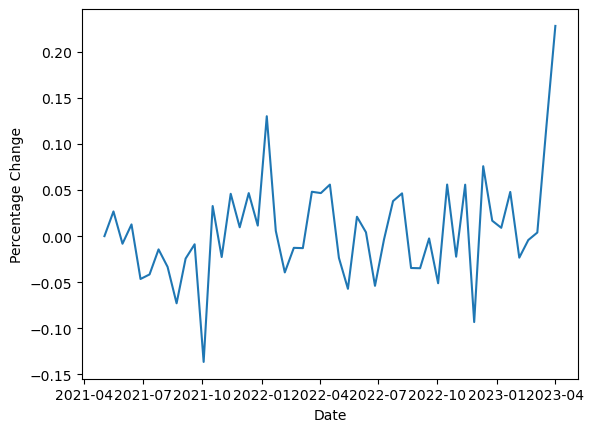

In [16]:
sns.lineplot(x = 'Date', data = result, y = 'Percentage Change')

In [17]:

varbound = np.array([[-1,1]]*nrows)      

algorithm_param = {'max_num_iteration': 100, 'population_size': 100, 'mutation_probability': 0.0125, 'elit_ratio': 0.01,
                    'crossover_probability': 0.7, 'parents_portion': 0.8, 'crossover_type': 'two_point',
                    'max_iteration_without_improv': 20}

# Create the genetic algorithm optimizer
model = ga(function=calculate_fitness, dimension=nrows, variable_type='real', variable_boundaries=varbound,
            algorithm_parameters=algorithm_param, function_timeout=120)


 The best solution found:                                                                           
 [-0.49662527 -0.21336418  0.79549279  0.72047796  0.22271197]

 Objective function:
 0.003038148153597917


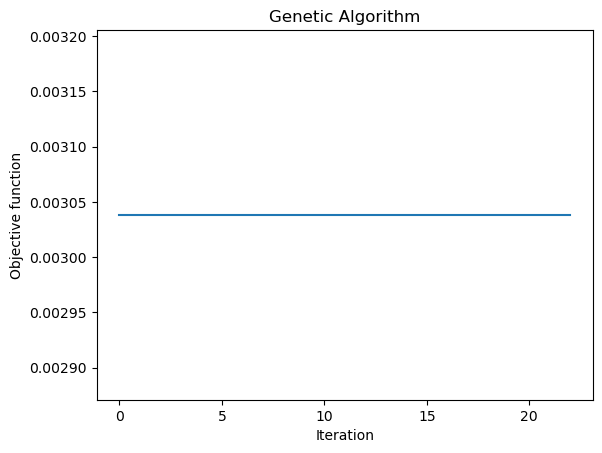

In [18]:
start = time.time()
model.run()
end = time.time()
print (f"Total time needed for algorithm to finish: "+ str(end-start))

In [19]:
b = model.best_variable

predicted = predict(params = b, real_data=result)
predicted = pd.DataFrame(predicted, columns=['Predicted'])

In [20]:
# Concatenating the DataFrames
result_df = pd.concat([result.reset_index(), predicted.reset_index()], axis = 1)
result_df = result_df[['Date', 'Percentage Change', 'Predicted']]

<AxesSubplot: >

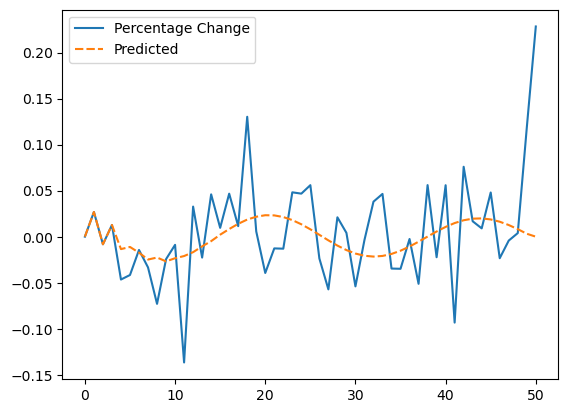

In [21]:
sns.lineplot(data=result_df)

In [22]:
mean_squared_error(result_df['Percentage Change'], result_df['Predicted'])

0.003038148153597917

## Weekly Aggregation

In [23]:
result = aggregate_weekly(data, start_date, end_date)
result

# Fitness Calculation
def calculate_fitness(params, real_data = result, nrows = nrows):
    # Initializing the predicted array
    pred_data = [0]*len(real_data['Percentage Change'])
    
    # Storing previous data
    pred_data[0:nrows] = real_data['Percentage Change'][0:nrows]
    
    # Making the prediction
    y = 0.0
    for i in range(nrows, len(real_data['Percentage Change'])):
        y = 0.0
        for j in range(0,nrows):
            y = y + (params[j] * pred_data[i - nrows + j])
        pred_data[i - 1] = y
        
    # Calculating fitness
    error = mean_squared_error(real_data['Percentage Change'],pred_data) 
    
    return error

# Fitness Calculation
def predict(params, real_data = result, nrows = nrows):
    # Initializing the predicted array
    pred_data = [0]*len(real_data['Percentage Change'])
    
    # Storing previous data
    pred_data[0:nrows] = real_data['Percentage Change'][0:nrows]
    
    # Making the prediction
    y = 0.0
    for i in range(nrows, len(real_data['Percentage Change'])):
        y = 0.0
        for j in range(0, nrows):
            y = y + (params[j] * pred_data[i - nrows + j])
        pred_data[i - 1] = y
        
        
    return pred_data

<AxesSubplot: xlabel='Date', ylabel='Percentage Change'>

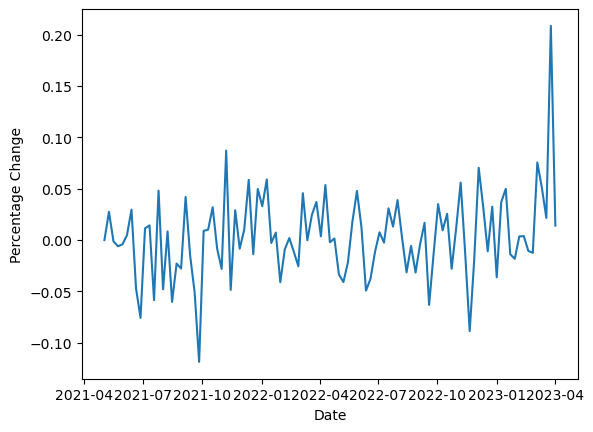

In [24]:
sns.lineplot(x = 'Date', data = result, y = 'Percentage Change')

In [25]:
varbound = np.array([[-1,1]]*nrows)      

algorithm_param = {'max_num_iteration': 100, 'population_size': 100, 'mutation_probability': 0.0125, 'elit_ratio': 0.01,
                    'crossover_probability': 0.7, 'parents_portion': 0.8, 'crossover_type': 'two_point',
                    'max_iteration_without_improv': 20}

# Create the genetic algorithm optimizer
model = ga(function=calculate_fitness, dimension=nrows, variable_type='real', variable_boundaries=varbound,
            algorithm_parameters=algorithm_param, function_timeout=120)

 The best solution found:                                                                           
 [-0.84073134  0.23459639  0.51419986  0.0221533  -0.45775092]

 Objective function:
 0.0016379861740400384


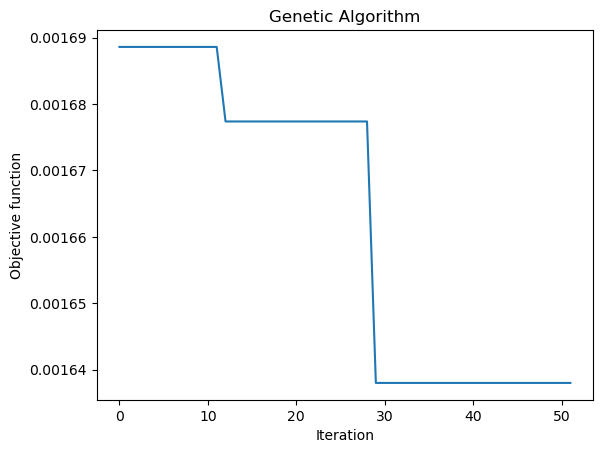

In [26]:
start = time.time()
model.run()
end = time.time()
print (f"Total time needed for algorithm to finish: "+ str(end-start))

In [27]:
w = model.best_variable

predicted = predict(params = w, real_data=result)
predicted = pd.DataFrame(predicted, columns=['Predicted'])

In [28]:
# Concatenating the DataFrames
result_df = pd.concat([result.reset_index(), predicted.reset_index()], axis = 1)
result_df = result_df[['Date', 'Percentage Change', 'Predicted']]

<AxesSubplot: >

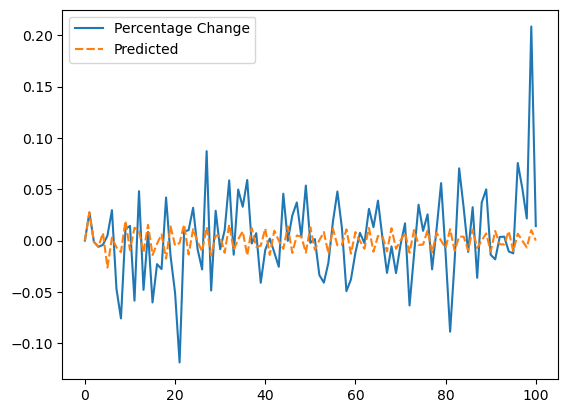

In [29]:
sns.lineplot(data=result_df)

In [30]:
mean_squared_error(result_df['Percentage Change'], result_df['Predicted'])

0.0016379861740400384